In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''') 

# <font color="#E56717">Comparative Effective Research</font>
## <font color="steelblue">Using SEER-Medicare to compare the efficacy and cost-effectiveness of different radiation treatment modalities for prostate cancer patients</font>

## IDA, 21 April 2017

### David Dooling

In [2]:
from IPython.display import IFrame

# <font color="#E56717">The Problem:</font>

* <span style="font-size:1.3em;">Two main classes of different types of external radiation beam therapy: $\gamma$ (photons) or other actual particles (protons in this case, but also research underway using carbon ions)</span>
* <span style="font-size:1.3em;">A $\gamma$-beam relatively inexpensive to generate, but less **controllable**. State of the art is $\bf{I}$ntensity $\bf{M}$odulated $\bf{R}$adiation $\bf{T}$herapy, but still causes collateral damage</span>
* <span style="font-size:1.3em;">$\bf{P}$roton $\bf{B}$eam $\bf{T}$herapy: More expensive to generate the particle beam, but causes much less collateral damage, based on plain physics and engineering principles</span>

###  <font color="red">Insurance companies pushing back; denying claims for PBT. Complicated appeal processes. Lack of clinical "evidence" given as justification. No RCT supporting the assumed benefits of PBT</font>

# <font color="#E56717">Results of the sponsored Study:</font>

<span style="font-size:1.7em;">Using a novel patient matching technique (using KDtrees) to distill the signal from the noise, the results show:

* <span style="font-size:1.7em;">Statistically significant better survival prognosis for PBT patients compared to IMRT</span>
* <span style="font-size:1.7em;">PBT lower complication rate than IMRT for rectal, bladder, endocrine system, and renal problems</span>
* <span style="font-size:1.7em;">And for approximately 30% of the matched groups, PBT patients have lower cumulative cost than their matched counterparts</span>

In [16]:
IFrame('https://www.bbc.com/news/uk-england-hampshire-29106294',width=800,height=400) # emotional appeals are moving, but will not sway insurance companies

## <font color="#E56717">Emotional appeals will not sway insurance companies. No RCT to point to; most practitioners will not knowingly give one arm of the study what they feel to be inferior treatment.</font>

# <font color="steelblue">Observational studies: Use the SEER-Medicare database</font>

# <font color="#E56717">Identify all the patients in the SEER-MEdicare data who have received PBT</font>

<span style="font-size:1.7em;">Can be done via $\bf{H}$ealthcare $\bf{C}$ommon $\bf{P}$ocedure $\bf{C}$odes:</span>

* <span style="font-size:1.7em;">75520 - Proton trmt simple w/o comp</span>
* <span style="font-size:1.7em;">77522 - Proton trmt simple w/comp</span>
* <span style="font-size:1.7em;">77523 - Proton trmt intermediate</span>
* <span style="font-size:1.7em;">77525 - Proton treatment complex</span>

# <font color="#E56717">Likewise identify all patients who have received IMRT</font>

* <span style="font-size:1.7em;">77418 - Intensity modulated treatment delivery</span>

# <font color="steelblue">Then we need to perform patient "matching" in order to make the claim that any observed differences (survival, complication rate, total cost) are due to the different treatment regimens, and not to other factors or attributes of the patients that may differ between the PBT group and the IMRT group</font>

<span style="font-size:1.7em;">A simple example to illustrate the need for matching, and how it increases your ability to draw conclusions from data:</font>

<span style="font-size:1.7em;">Imagine a rental car agency that suspects that gasoline B get better miles per gallon than does gasoline A. The effect is $\bf{real}$, in the sense that if they use gasoline A for all cars one month at one location, and also use gasoline B at the sister location, gasoline B performs better</span>

<span style="font-size:1.7em;">But if you apply a standard unpaired t-test to see if this effect may be due to chance, you cannot rule out that it is infact due to chance:</span>

In [14]:
import pandas as pd
import qgrid
qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folder
qgrid.set_defaults(remote_js=True, show_toolbar=True,
                  grid_options = {'enableColumnReorder': True,
                                 'defaultColumnWidth': 250})

gas_a_list =[27.01, 20, 23.41, 25.22, 30.11,
             25.55, 22.23, 19.78, 33.45, 25.22]

gas_b_list = [26.95, 20.44, 25.05, 26.32, 29.56,
             26.60, 22.93, 20.23, 33.95, 26.01]

dfgas = pd.DataFrame({'gas_a_mpg': gas_a_list,
                         'gas_b_mpg': gas_b_list})

In [17]:
dfgas

,gas_a_mpg,gas_b_mpg
0,27.01,26.95
1,20.00,20.44
2,23.41,25.05
3,25.22,26.32
4,30.11,29.56
5,25.55,26.60
6,22.23,22.93
7,19.78,20.23
8,33.45,33.95
9,25.22,26.01


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
matplotlib.style.use('fivethirtyeight')
matplotlib.style.use('seaborn-talk')
import os
import collections

import seaborn as sns
import sklearn as sk
import statsmodels as sm
from datetime import datetime

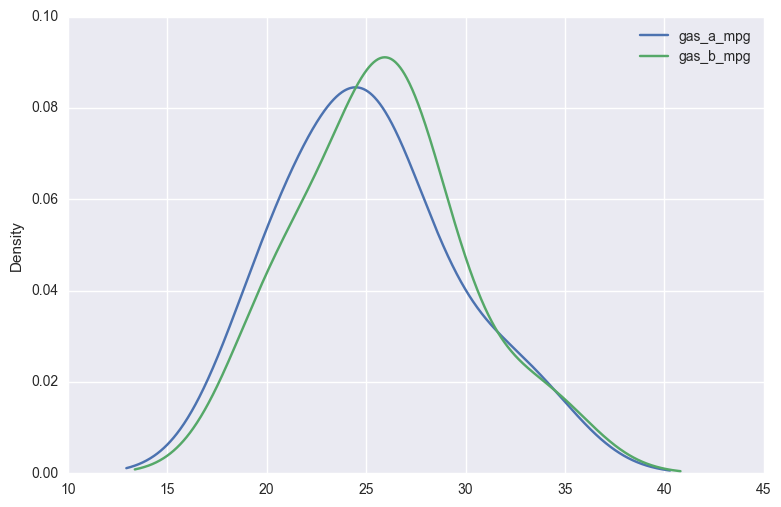

In [21]:
dfgas.plot.kde();

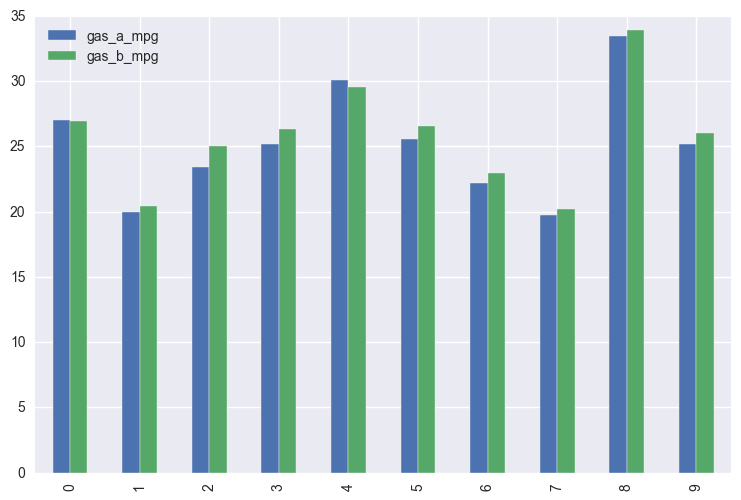

In [22]:
dfgas[['gas_a_mpg','gas_b_mpg']].plot(kind='bar');

<span style="font-size:1.7em;">If you perform a standard, non-paired hypothesis test to see if the means differ, you conclude that it is just random luck and that there is no effect. The problem is that even though gas b is slightly better than gas a, the large standard deviations induce a large standard error - the mileages vary widely from one car to the next. Analagous to the situation with patients in the SEER-Medicare data.</span>

<span style="font-size:1.5em;">If you assign gas a and gas b to the $\bf{same}$ car on different days, and then record the milage, you can rule out the null hypothesis even with this small dataset. This happens because the standard deviations of the differences among the pairs are now small. This difference column, by comparing gas performance within a single car, eliminates the variability between cars.</span>

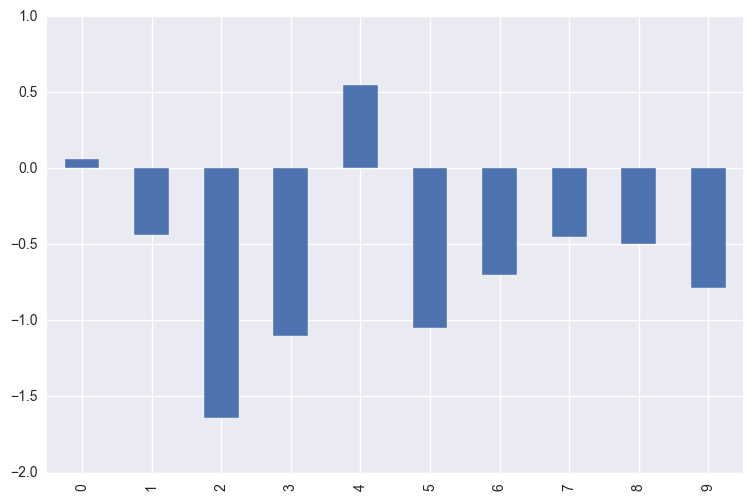

In [23]:
dfgas['diff'] = dfgas.gas_a_mpg - dfgas.gas_b_mpg
dfgas['diff'].plot(kind='bar');